In [1]:
# We're using these tools to help us work with data and make predictions
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Let's open our data file and read it
df = pd.read_stata('C:/dhs data/datasets/ZMIR71DT/ZMIR71FL.DTA', convert_categoricals=False)

# This part of the code explains what we just did
# We used pandas to read a special kind of file (Stata file)
# We're telling pandas not to automatically change some data types

# Now, we're making a new column that tells us if a child is alive
b5_columns = [f'b5_{i:02d}' for i in range(1, 21)]
df['child_alive'] = df[b5_columns].apply(lambda x: x.any(), axis=1).astype(int)

# Here's what that code does:
# We look at 20 columns (b5_01 to b5_20) for each row
# If any of these columns has a value, we say the child is alive (1)
# If all are empty, we say the child is not alive (0)

# We only want to look at numbers for now
numeric_df = df.select_dtypes(include=['number'])

# This code picks out only the columns with numbers in them

# Let's see which numbers are most related to whether a child is alive
correlations = numeric_df.corr()['child_alive'].sort_values(ascending=False).head(10)
print("Top Correlations with 'child_alive':\n", correlations)

# This code does a few things:
# 1. It checks how each number column relates to 'child_alive'
# 2. It sorts these relationships from strongest to weakest
# 3. It shows us the top 10 strongest relationships

# We'll use these top related features for our prediction model
top_features = ['s1205', 'v220', 'v219', 'v218', 'v502', 'v224', 'v201', 'v535', 'v525']

# We're picking out the columns that seem most important

# Setting up our data for the prediction model
X = df[top_features]
y = df['child_alive']

# X is all our important columns (features)
# y is what we want to predict (if a child is alive)

# Some data might be missing, so we'll fill in the blanks
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# This code fills in any missing data with the middle value of that column

# Now we split our data into two parts: one for training, one for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This helps us see how well our model works on new data
# We use 80% of the data to train and 20% to test

# Let's try our first prediction model: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# We're teaching our model using the training data
# Then we use it to make predictions on the test data

# Let's see how well our Logistic Regression model did
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_pred_lr))

# These numbers tell us how good our predictions are in different ways

# Now let's try another model: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# This is a different kind of model that might work better

# Let's check how well the Random Forest model did
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_rf))

# Again, these numbers show us how good this model's predictions are

# we can add more models here if we want to try other ways of predicting

C:\Users\tlche\AppData\Local\Temp\ipykernel_14720\2189600026.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['child_alive'] = df[b5_columns].apply(lambda x: x.any(), axis=1).astype(int)


Top Correlations with 'child_alive':
 child_alive    1.000000
s1205          0.973329
v220           0.672344
v219           0.622415
v218           0.621654
v502           0.617962
v224           0.603842
v201           0.603842
v535           0.589213
v525           0.571609
Name: child_alive, dtype: float64

Logistic Regression Results:
Accuracy: 0.999269272926562
Precision: 0.9990234375
Recall: 1.0
AUC: 0.9985528219971057

Random Forest Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC: 1.0


In [2]:
import joblib

# Save the RandomForest model
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

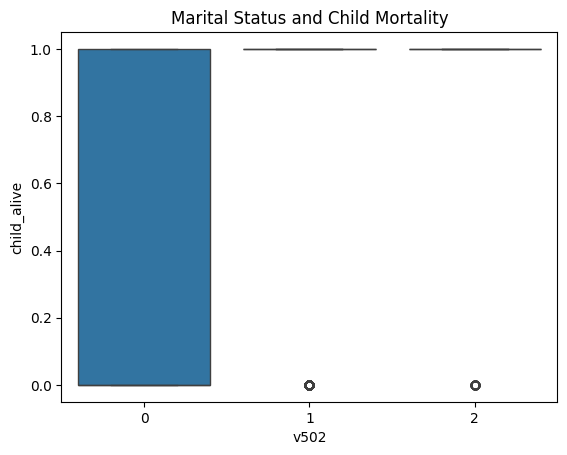

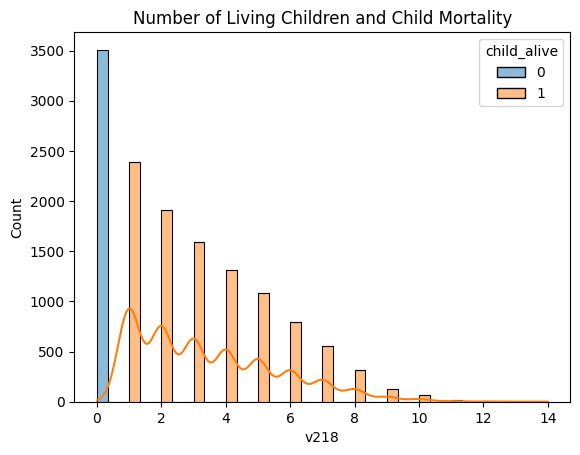

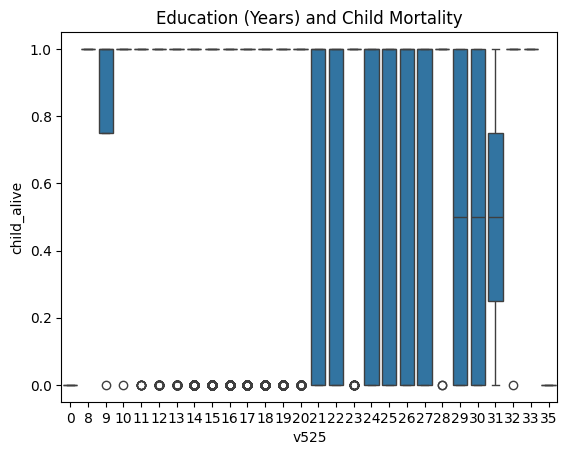

In [6]:
# Save the dataframe in the current working directory
df.to_csv('updated_ZMIR71FL_with_child_alive.csv', index=False)

# Boxplot of marital status vs. child mortality
sns.boxplot(x='v502', y='child_alive', data=df)
plt.title('Marital Status and Child Mortality')
plt.show()

# Histogram of the number of living children and child mortality
sns.histplot(data=df, x='v218', hue='child_alive', multiple='stack', kde=True)
plt.title('Number of Living Children and Child Mortality')
plt.show()

# Boxplot of educational attainment vs. child mortality
sns.boxplot(x='v525', y='child_alive', data=df)
plt.title('Education (Years) and Child Mortality')
plt.show()




In [7]:
# Selecting the top features along with the 'child_alive' variable
top_features_with_child_alive = df[top_features + ['child_alive']]

# Exporting the table to a CSV file
top_features_with_child_alive.to_csv('top_features_with_child_alive.csv', index=False)

# Confirmation message
print("Table exported to 'top_features_with_child_alive.csv'")


   s1205  v220  v219  v218  v502  v224  v201  v535  v525  child_alive
0    NaN     6     6     6     1     8     8   NaN    16            1
1    NaN     1     1     1     1     1     1   NaN    15            1
2    NaN     4     4     3     1     3     3   NaN    18            1
3    NaN     2     2     2     1     2     2   NaN    11            1
4    NaN     6     6     6     1     6     6   NaN    17            1


In [1]:
# We're using these tools to help us work with data and make predictions
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Let's open our data file and read it
df = pd.read_stata('C:/dhs data/datasets/ZMIR71DT/ZMIR71FL.DTA', convert_categoricals=False)

# Now, we're making a new column that tells us if a child is alive
b5_columns = [f'b5_{i:02d}' for i in range(1, 21)]
df['child_alive'] = df[b5_columns].apply(lambda x: x.any(), axis=1).astype(int)

# We only want to look at numbers for now
numeric_df = df.select_dtypes(include=['number'])

# Let's see which numbers are most related to whether a child is alive
correlations = numeric_df.corr()['child_alive'].sort_values(ascending=False).head(10)
print("Top Correlations with 'child_alive':\n", correlations)

# We'll use these top related features for our prediction model
top_features = ['s1205', 'v220', 'v219', 'v218', 'v502', 'v224', 'v201', 'v535', 'v525']

# Setting up our data for the prediction model
X = df[top_features]
y = df['child_alive']

# Some data might be missing, so we'll fill in the blanks
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Let's try Logistic Regression with 5-fold Cross-Validation
lr_model = LogisticRegression(max_iter=1000)
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Scores:", lr_cv_scores)
print("Logistic Regression Mean Accuracy:", lr_cv_scores.mean())

# You can also calculate other metrics during cross-validation (e.g., precision, recall, AUC)
lr_cv_results = cross_val_score(lr_model, X, y, cv=5, scoring='roc_auc')
print("Logistic Regression Mean AUC:", lr_cv_results.mean())

# Now let's try Random Forest with 5-fold Cross-Validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean Accuracy:", rf_cv_scores.mean())

# You can also calculate AUC for Random Forest
rf_cv_results = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')
print("Random Forest Mean AUC:", rf_cv_results.mean())


C:\Users\tlche\AppData\Local\Temp\ipykernel_16060\169108020.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['child_alive'] = df[b5_columns].apply(lambda x: x.any(), axis=1).astype(int)


Top Correlations with 'child_alive':
 child_alive    1.000000
s1205          0.973329
v220           0.672344
v219           0.622415
v218           0.621654
v502           0.617962
v224           0.603842
v201           0.603842
v535           0.589213
v525           0.571609
Name: child_alive, dtype: float64

Logistic Regression Cross-Validation Scores: [1.         1.         0.99963464 1.         0.99926901]
Logistic Regression Mean Accuracy: 0.9997807284622467
Logistic Regression Mean AUC: 1.0

Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest Mean Accuracy: 1.0
Random Forest Mean AUC: 1.0
